**Importing Libraries:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Loading the Dataset**

In [2]:
data=pd.read_csv("/content/StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Check missing values**

In [4]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


**Statistical Summary of the Dataset**

In [7]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [8]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical Features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


**Convert Categorical Features to Numeric (One-Hot Encoding)**


In [9]:
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
print("Shape of data after One-Hot Encoding:", data_encoded.shape)
data_encoded.head()

Shape of data after One-Hot Encoding: (6378, 28)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


**Exploratory Data Analysis (EDA)**


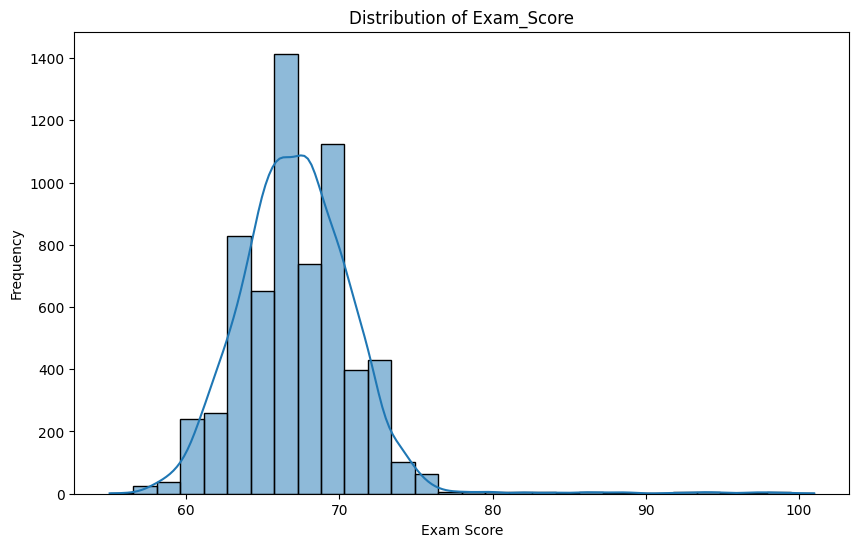

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['Exam_Score'], kde=True, bins=30)
plt.title('Distribution of Exam_Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

In [11]:
data=data_encoded

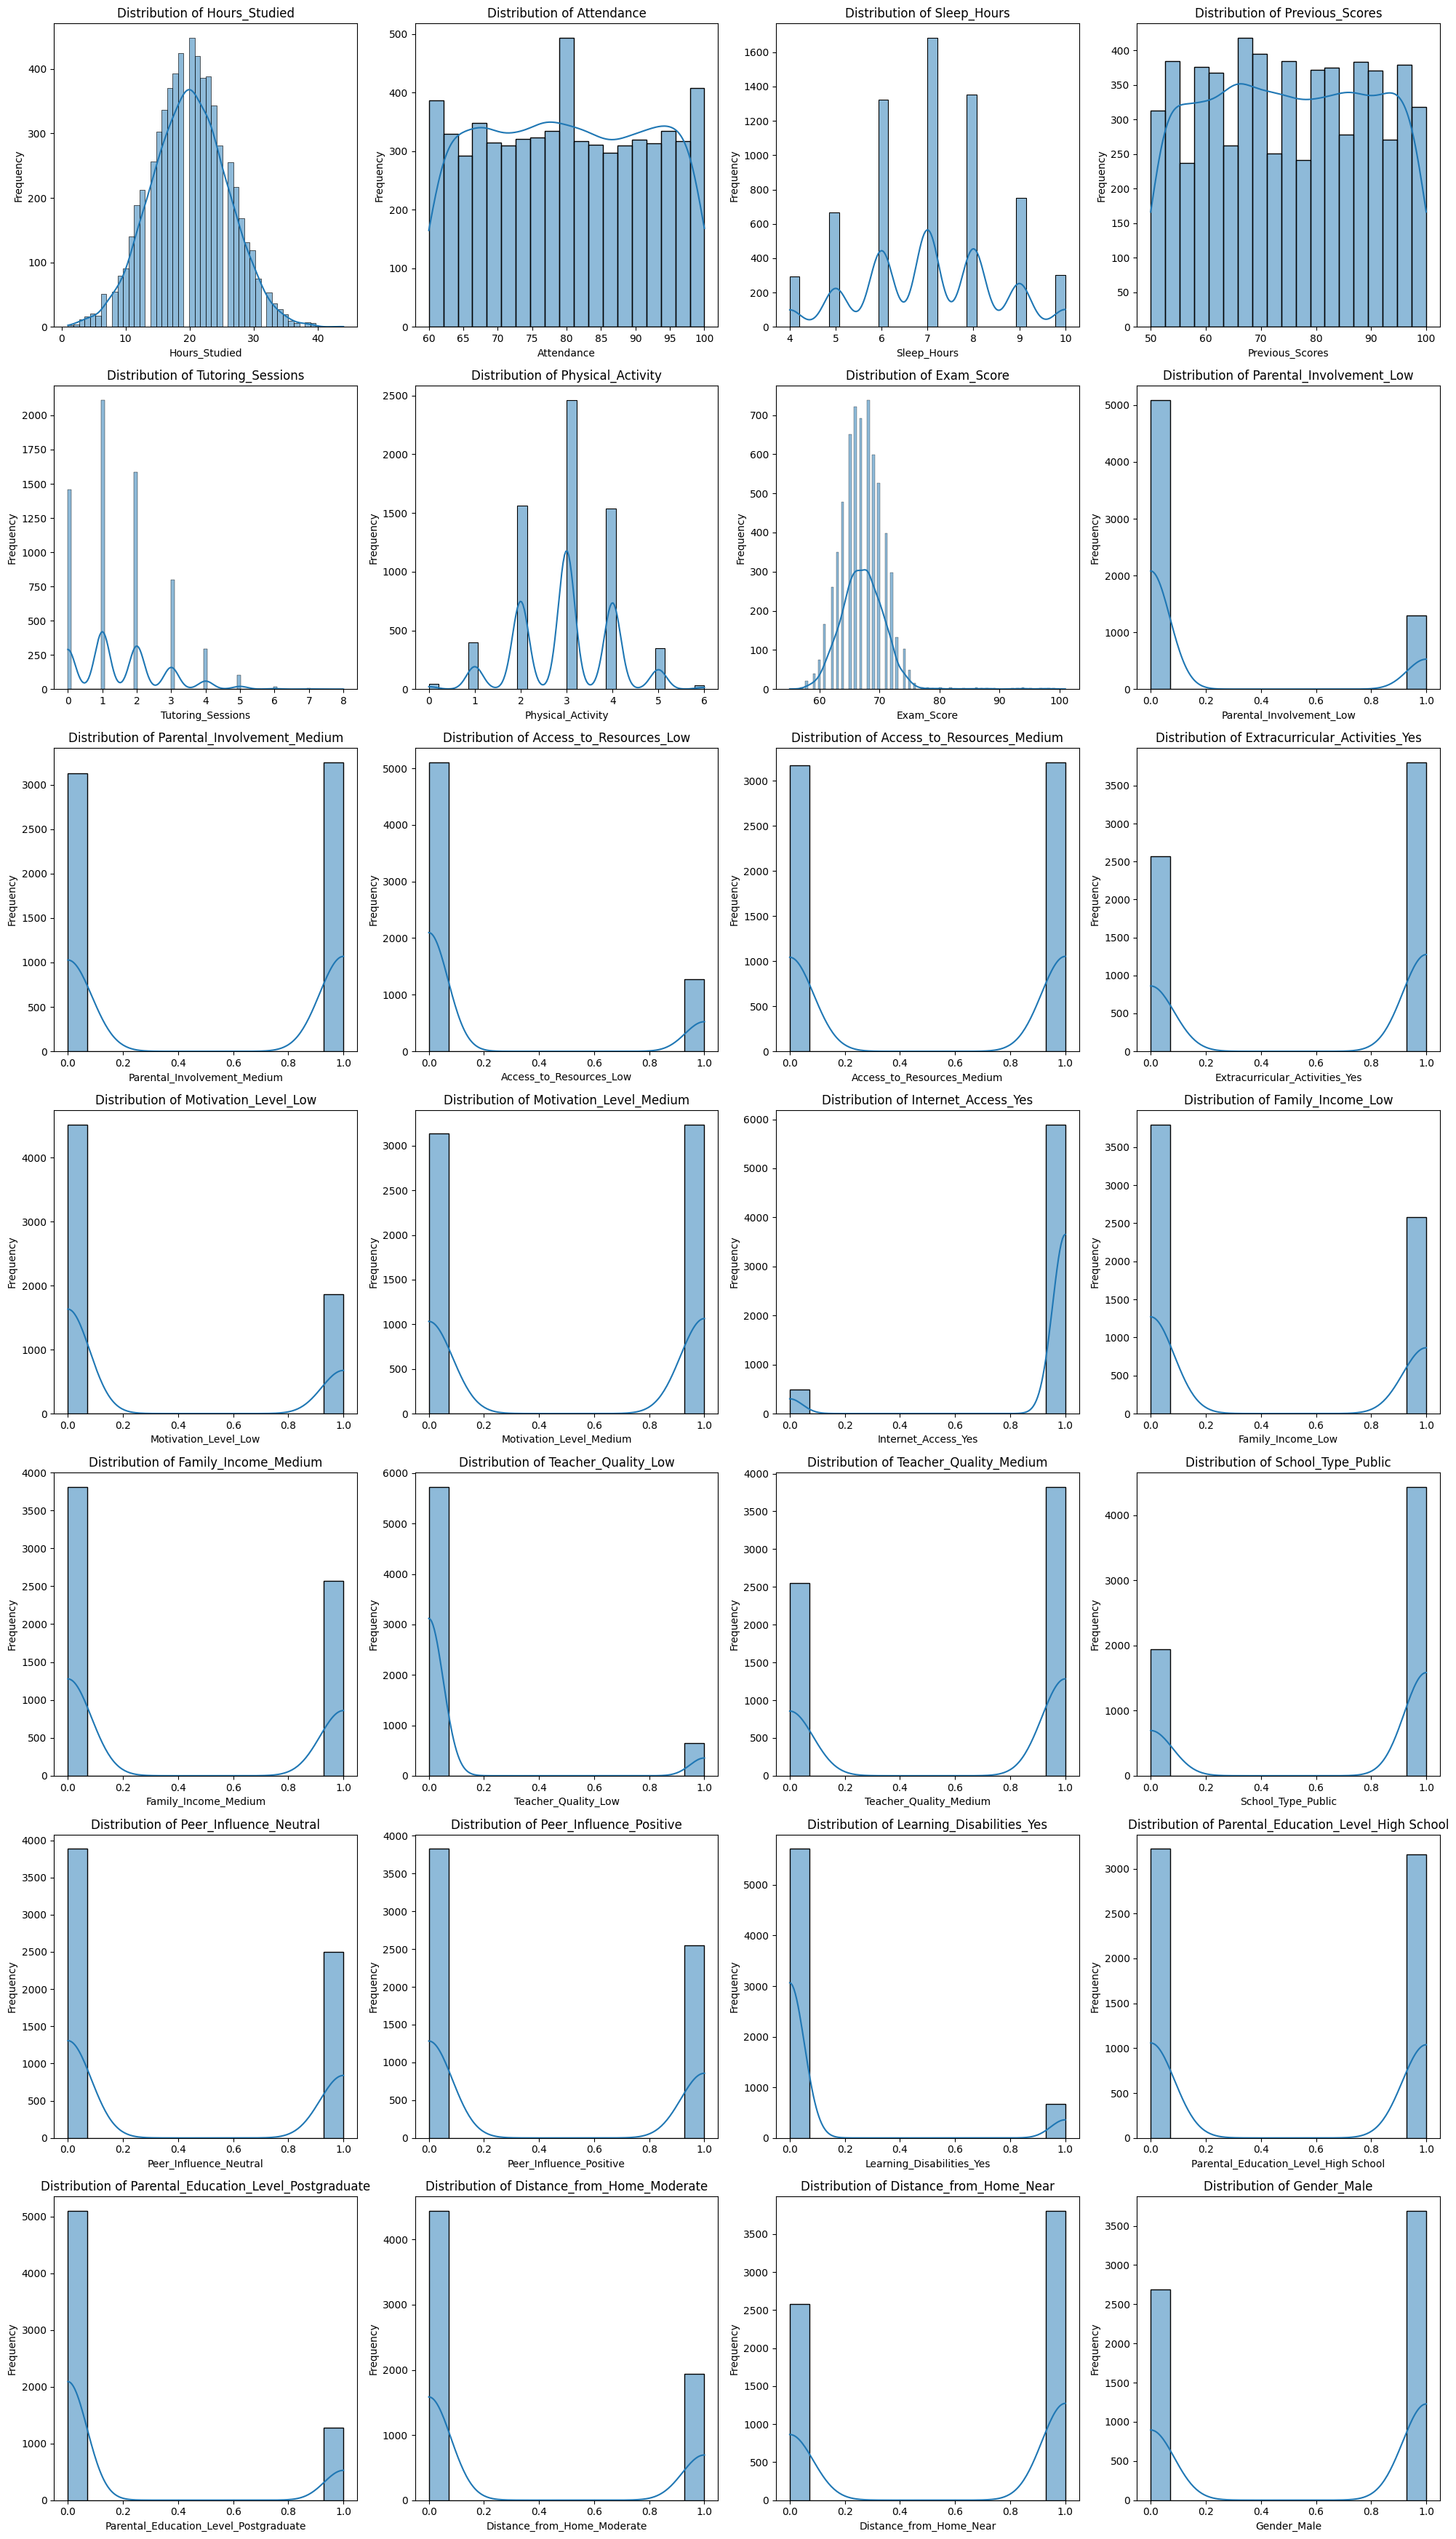

In [12]:
num_cols = len(data.columns)
num_rows = (num_cols + 3) // 4
plt.figure(figsize=(20, 5 * num_rows))

for i, column in enumerate(data.columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlation of Numerical Features with Exam_Score:
Exam_Score           1.000000
Attendance           0.580259
Hours_Studied        0.445104
Previous_Scores      0.174283
Tutoring_Sessions    0.156829
Physical_Activity    0.025148
Sleep_Hours         -0.017171
Name: Exam_Score, dtype: float64

Now, let's visualize the relationship between categorical features and Exam_Score using boxplots.

Now, let's visualize the relationship between one-hot encoded categorical features (boolean columns) and Exam_Score using boxplots.


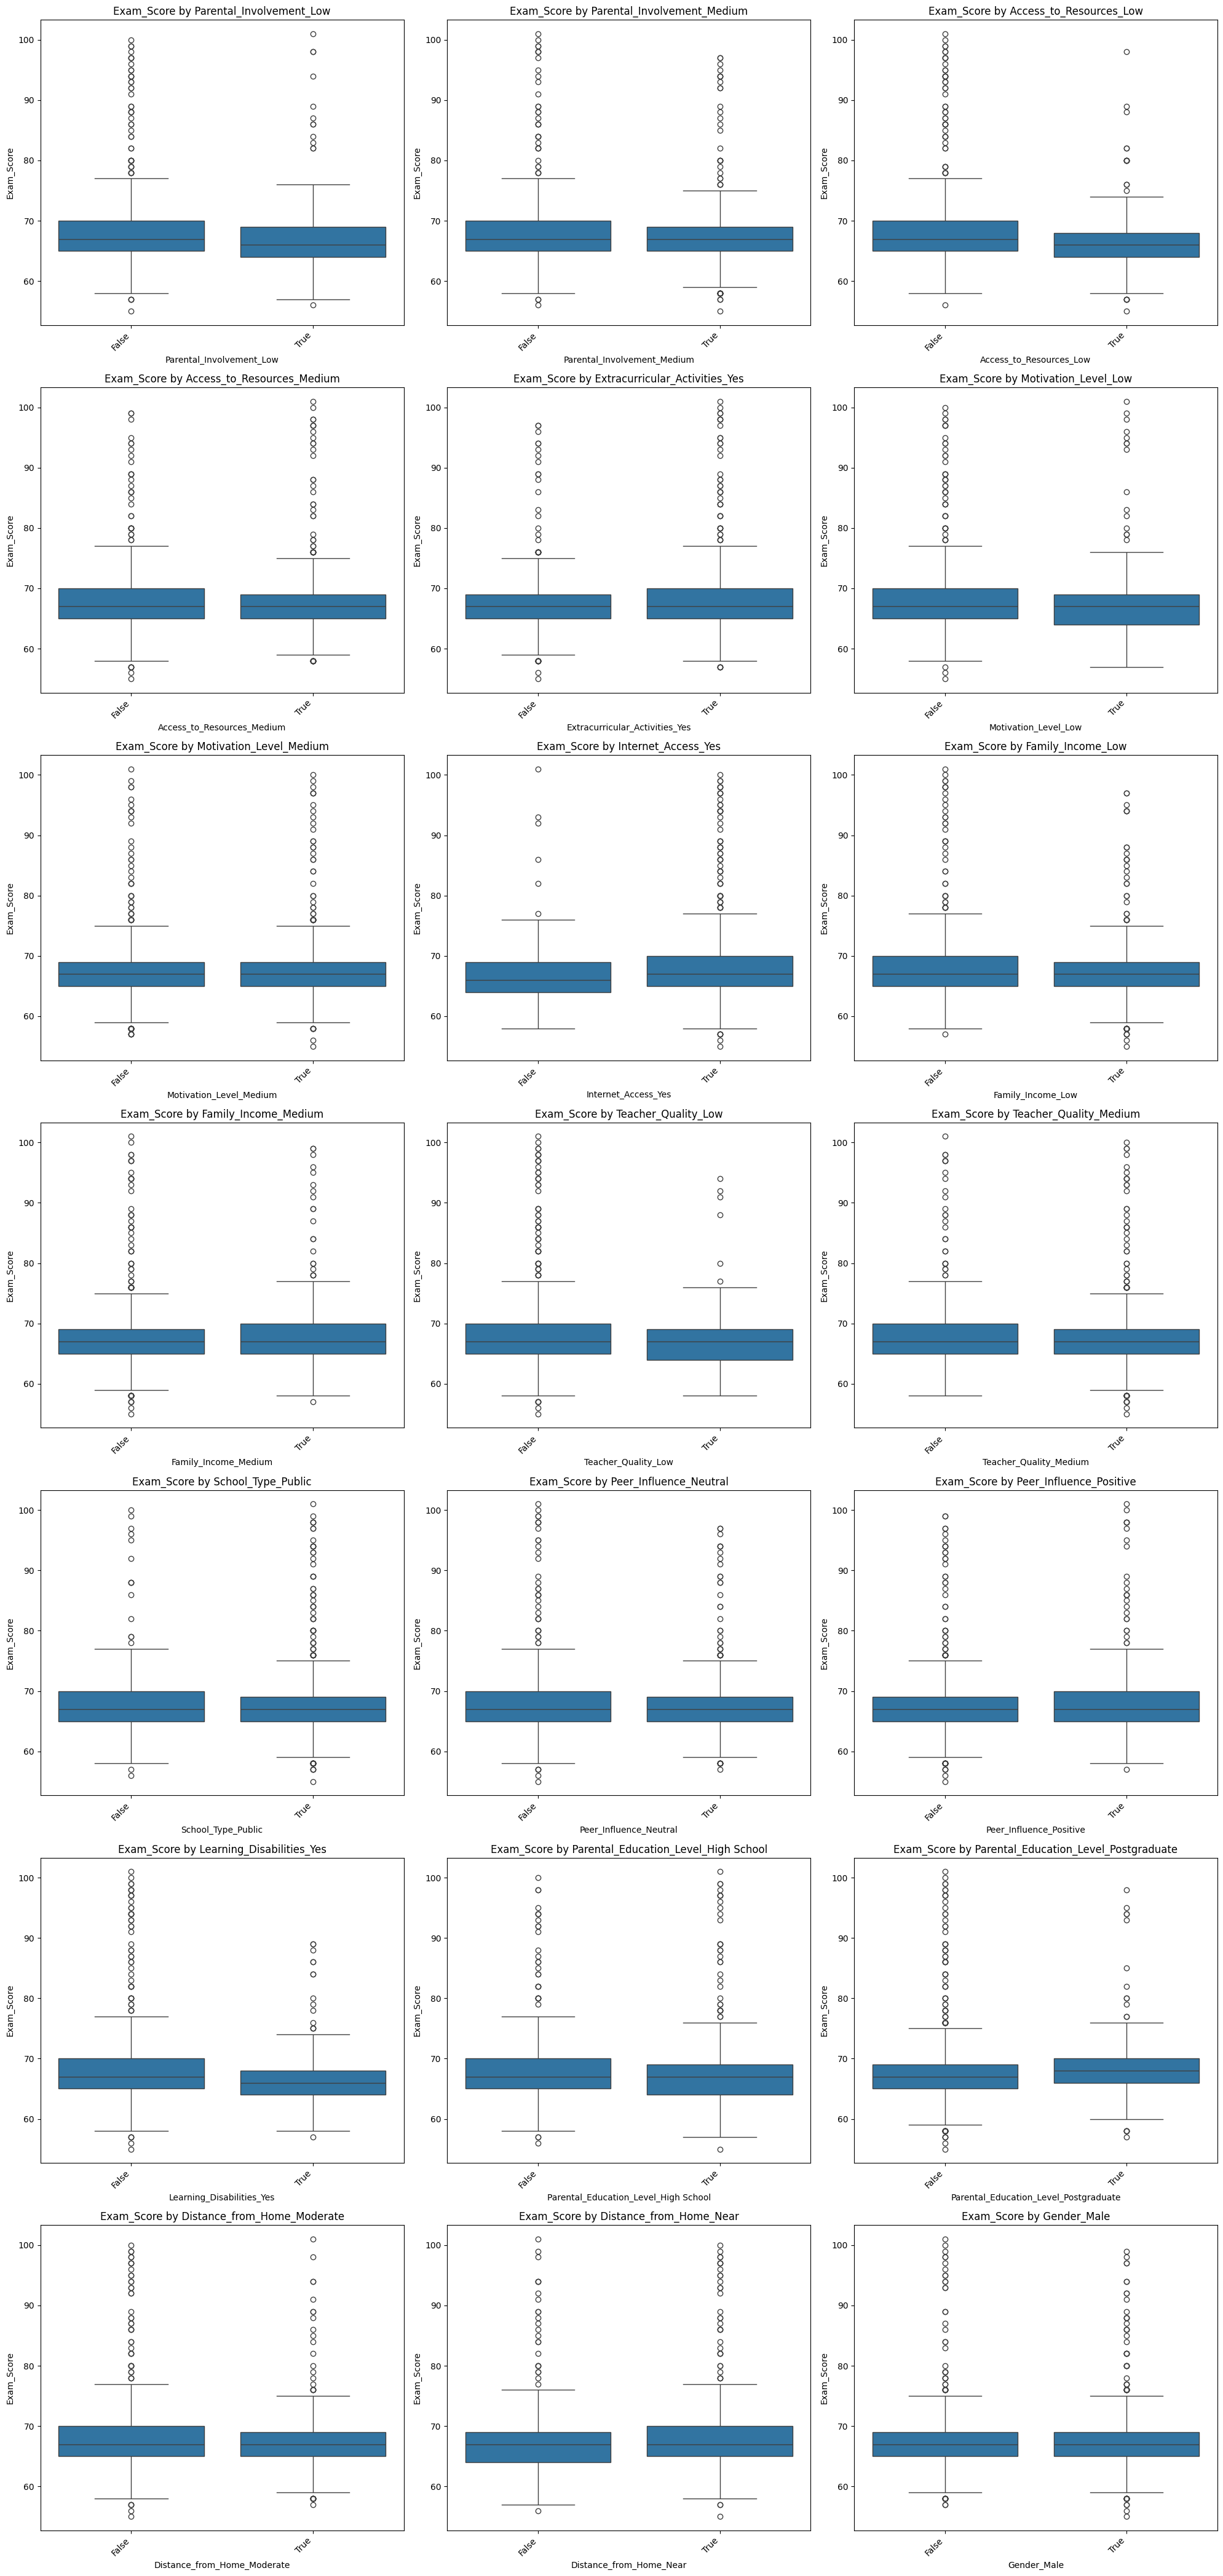

In [13]:
print("Correlation of Numerical Features with Exam_Score:")
correlation_matrix = data_encoded[numerical_features].corr()
print(correlation_matrix['Exam_Score'].sort_values(ascending=False))

print("\nNow, let's visualize the relationship between categorical features and Exam_Score using boxplots.")

boolean_features = data_encoded.select_dtypes(include=['bool']).columns.tolist()

print("\nNow, let's visualize the relationship between one-hot encoded categorical features (boolean columns) and Exam_Score using boxplots.")

num_boolean_features = len(boolean_features)
num_rows_bool = (num_boolean_features + 2) // 3 # Adjust for 3 columns per row

plt.figure(figsize=(20, 6 * num_rows_bool))

for i, feature in enumerate(boolean_features):
    plt.subplot(num_rows_bool, 3, i + 1)
    sns.boxplot(x=data_encoded[feature], y=data_encoded['Exam_Score'])
    plt.title(f'Exam_Score by {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

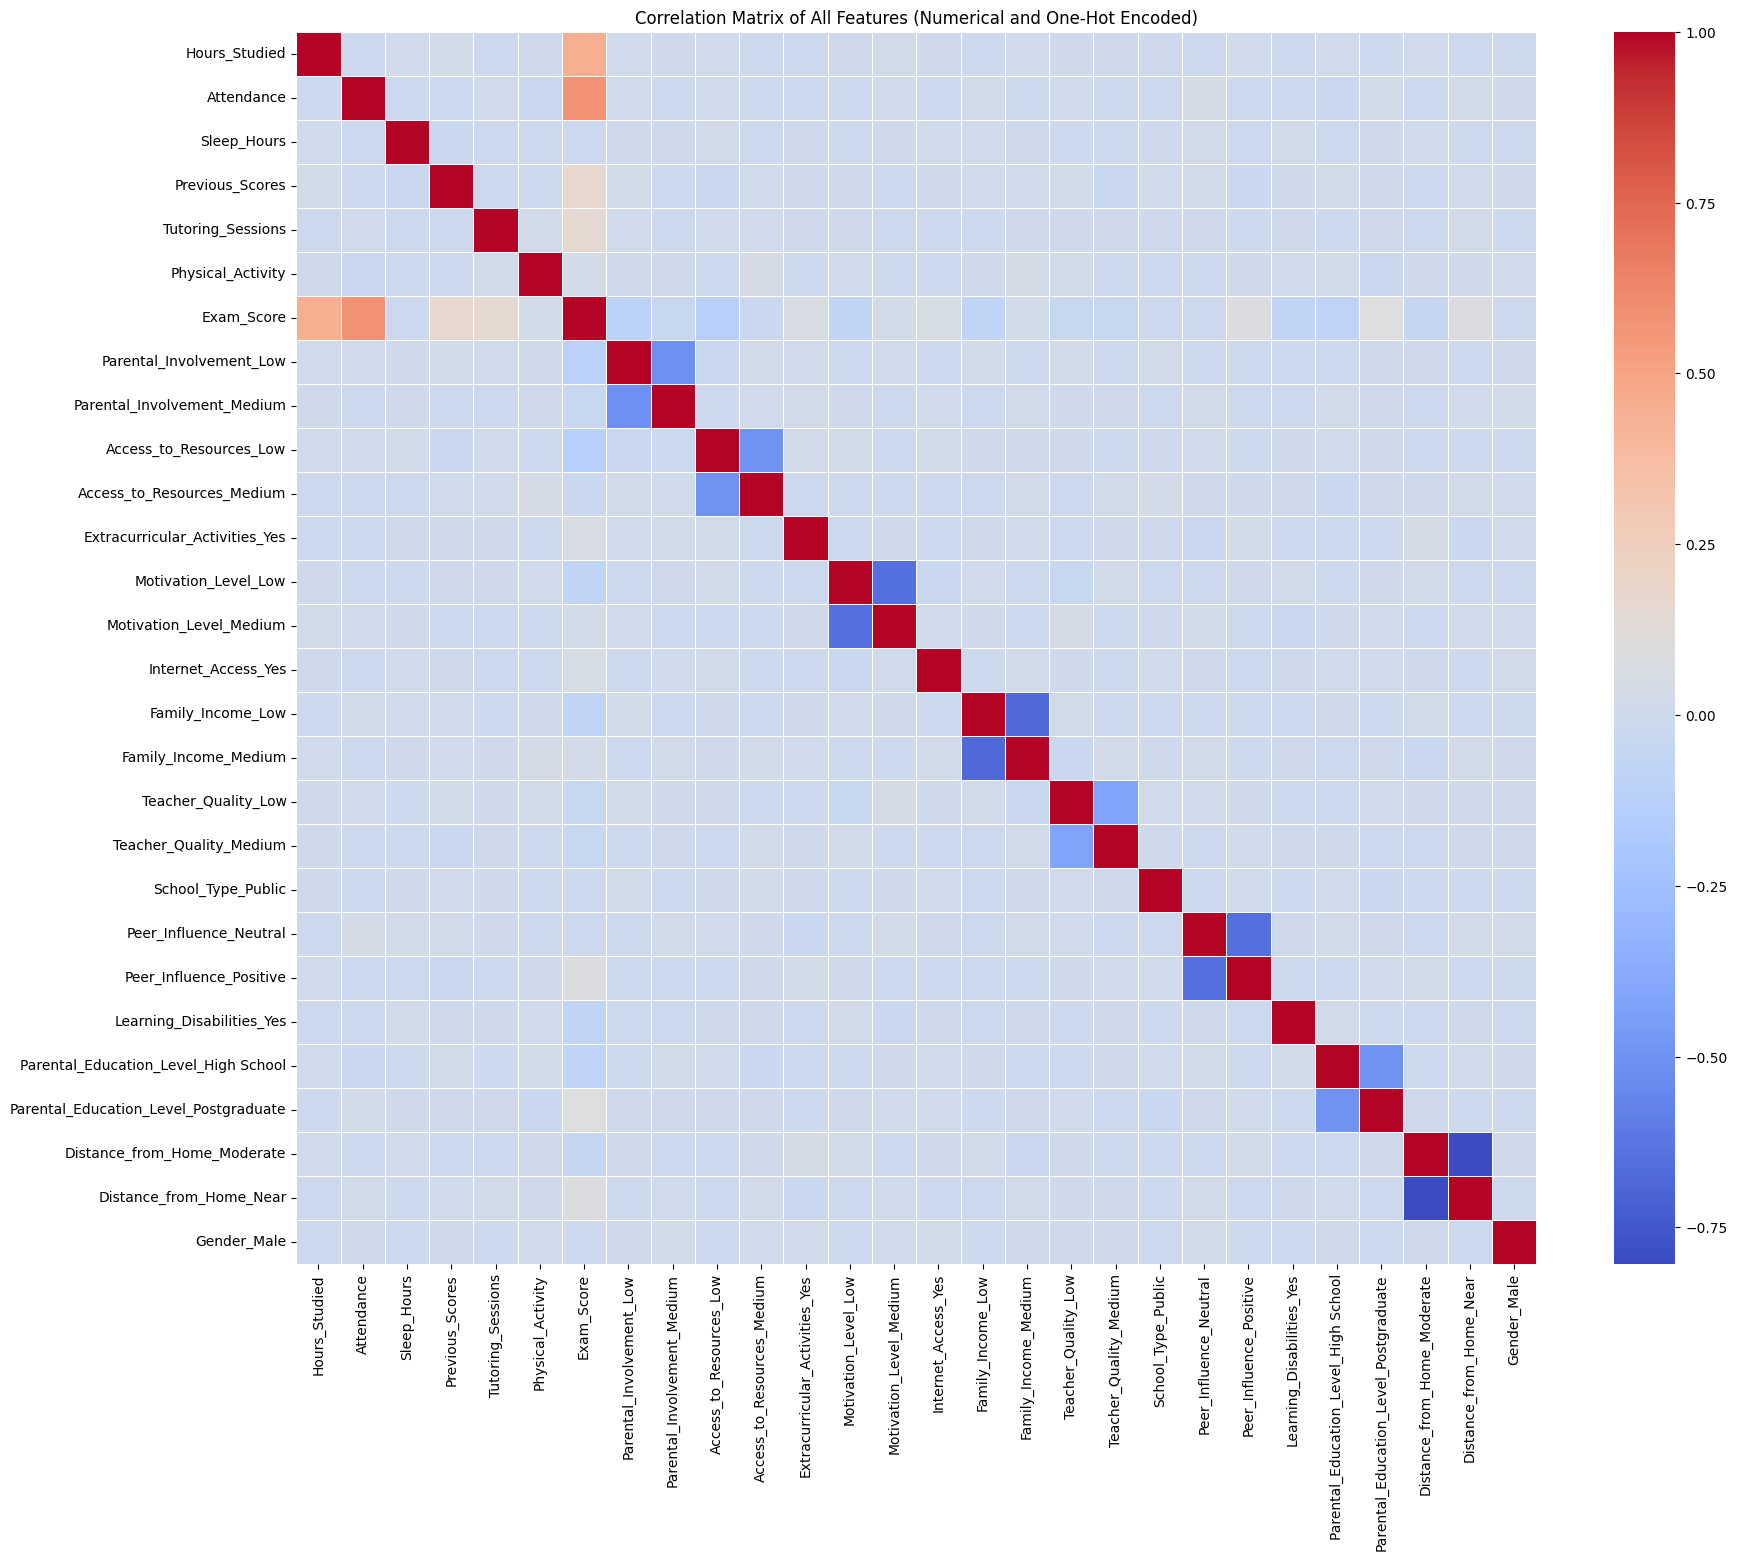

In [14]:
plt.figure(figsize=(20, 16))
full_correlation_matrix = data.corr()
sns.heatmap(full_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of All Features (Numerical and One-Hot Encoded)')
plt.show()

**Handle skewness**

In [15]:
data['score_log'] = np.log1p(data['Tutoring_Sessions'])
y = data['Exam_Score']
# log transform
y_transformed = np.log1p(y)


**Drop columns**

In [16]:
drop_cols = [
    'Motivation_Level_Medium',
    'Sleep_Hours',
    'Gender_Male',
    'School_Type_Public'
]

data.drop(columns=drop_cols, inplace=True)


In [17]:
data.head(15)

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,score_log
0,23,84,73,0,3,67,True,False,False,False,...,False,True,False,True,False,True,False,False,True,0.000000
1,19,64,59,2,4,61,True,False,False,True,...,False,True,False,False,False,False,False,True,False,1.098612
2,24,98,91,2,4,74,False,True,False,True,...,False,True,True,False,False,False,True,False,True,1.098612
3,29,89,98,1,4,71,True,False,False,True,...,False,True,False,False,False,True,False,True,False,0.693147
4,19,92,65,3,4,70,False,True,False,True,...,False,False,True,False,False,False,False,False,True,1.386294
5,19,88,89,3,3,71,False,True,False,True,...,False,True,False,True,False,False,True,False,True,1.386294
6,29,84,68,1,2,67,False,True,True,False,...,False,True,True,False,False,True,False,True,False,0.693147
7,25,78,50,1,2,66,True,False,False,False,...,False,False,False,False,False,True,False,False,False,0.693147
8,17,94,80,0,1,69,False,True,False,False,...,True,False,True,False,False,False,False,False,True,0.000000
9,23,98,71,0,5,72,False,True,False,True,...,False,False,False,True,False,True,False,True,False,0.000000


**Save the dataset**

In [18]:
import pickle

with open("data.pkl", "wb") as f:
    pickle.dump(data, f)

print("✅ Preprocessed dataset saved as data.pkl")


✅ Preprocessed dataset saved as data.pkl


**Splitting the dataset**

In [19]:
X = data.drop('Exam_Score', axis=1)
y = y_transformed

print("Shape of input features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of input features (X): (6378, 24)
Shape of target variable (y): (6378,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5102, 24)
Shape of X_test: (1276, 24)
Shape of y_train: (5102,)
Shape of y_test: (1276,)


**Model Loading**


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}


In [22]:
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [23]:
best_gb_model = grid_search.best_estimator_

print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.8}


**Check Prediction**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_transformed = best_gb_model.predict(X_test)
# y_pred_transformed = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_transformed))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_transformed)))
print("R2 Score:", r2_score(y_test, y_pred_transformed))


MAE: 0.00903112048285662
RMSE: 0.026737686628257352
R2 Score: 0.7720212900219982


In [25]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor
model_to_save = best_gb_model
# Save the model
joblib.dump(model_to_save, 'gradient_boosting_model.pkl')
print("Gradient Boosting model saved successfully as 'gradient_boosting_model.pkl'!")
# Provide a download link
from google.colab import files
files.download('gradient_boosting_model.pkl')

Gradient Boosting model saved successfully as 'gradient_boosting_model.pkl'!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Check the importance of features**

In [ ]:
import pandas as pd

# trained random forest model
rf = best_gb_model   # ya jo tumne train kiya hai

rf_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(rf_importance)


Attendance                               0.444272
Hours_Studied                            0.295796
Previous_Scores                          0.046955
Parental_Involvement_Low                 0.030579
Access_to_Resources_Low                  0.028004
score_log                                0.019525
Tutoring_Sessions                        0.015967
Access_to_Resources_Medium               0.013002
Family_Income_Low                        0.012280
Peer_Influence_Positive                  0.011256
Parental_Involvement_Medium              0.009811
Distance_from_Home_Near                  0.008718
Motivation_Level_Low                     0.008552
Learning_Disabilities_Yes                0.008120
Parental_Education_Level_High School     0.006954
Parental_Education_Level_Postgraduate    0.006494
Extracurricular_Activities_Yes           0.006274
Internet_Access_Yes                      0.005622
Teacher_Quality_Medium                   0.005614
Physical_Activity                        0.005383


**Random Forest model**  note: (it gives less accuacy then xg boost model)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }


In [ ]:
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

In [ ]:
# best_model = grid_search.best_estimator_

# print("Best Parameters:")
# print(grid_search.best_params_)


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# y_pred_transformed= best_model.predict(X_test)

# print("MAE:", mean_absolute_error(y_test, y_pred_transformed))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_transformed)))
# print("R2 Score:", r2_score(y_test, y_pred_transformed))


**User Interface(Gadio)**

In [ ]:
import pandas as pd
import numpy as np
import joblib
import gradio as gr
import pickle

# 🔹 Load the preprocessed dataset (previously saved)
with open("data.pkl", "rb") as f:
    data_encoded_for_model = pickle.load(f)

# Load the trained Gradient Boosting model
loaded_model = joblib.load('gradient_boosting_model.pkl')

# Define the exact columns that the model was trained on
X_model_columns = [
    'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity',
    'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_Low',
    'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes', 'Motivation_Level_Low',
    'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_Low',
    'Teacher_Quality_Medium', 'Peer_Influence_Neutral', 'Peer_Influence_Positive',
    'Learning_Disabilities_Yes', 'Parental_Education_Level_High School',
    'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
    'Distance_from_Home_Near', 'score_log'
]

original_categorical_features_for_dummies = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
    'Distance_from_Home'
]

def predict_exam_score(
    hours_studied, attendance, previous_scores, tutoring_sessions, physical_activity,
    parental_involvement, access_to_resources, extracurricular_activities, motivation_level,
    internet_access, family_income, teacher_quality, peer_influence, learning_disabilities,
    parental_education_level, distance_from_home
):
    input_data_dict = {
        'Hours_Studied': [hours_studied],
        'Attendance': [attendance],
        'Previous_Scores': [previous_scores],
        'Tutoring_Sessions': [tutoring_sessions],
        'Physical_Activity': [physical_activity],
        'Parental_Involvement': [parental_involvement],
        'Access_to_Resources': [access_to_resources],
        'Extracurricular_Activities': [extracurricular_activities],
        'Motivation_Level': [motivation_level],
        'Internet_Access': [internet_access],
        'Family_Income': [family_income],
        'Teacher_Quality': [teacher_quality],
        'Peer_Influence': [peer_influence],
        'Learning_Disabilities': [learning_disabilities],
        'Parental_Education_Level': [parental_education_level],
        'Distance_from_Home': [distance_from_home]
    }
    input_df = pd.DataFrame(input_data_dict)
    input_df_encoded = pd.get_dummies(input_df, columns=original_categorical_features_for_dummies, drop_first=True)
    input_df_encoded['score_log'] = np.log1p(input_df_encoded['Tutoring_Sessions'])

    final_input_features = pd.DataFrame(0, index=[0], columns=X_model_columns)
    for col in X_model_columns:
        if col in input_df_encoded.columns:
            final_input_features[col] = input_df_encoded[col].iloc[0]

    # Handle specifically dropped columns by ensuring their corresponding input features are 0
    # For 'Motivation_Level_Medium', it was explicitly dropped. If 'Medium' is chosen, it results in neither
    # Motivation_Level_Low nor Motivation_Level_Medium being 1 in the model's input.
    # 'Motivation_Level_High' is the reference category (both 'Low' and 'Medium' are 0).
    if 'Motivation_Level_Low' in final_input_features.columns:
        if motivation_level == 'Low':
            final_input_features['Motivation_Level_Low'] = 1
        else:
            final_input_features['Motivation_Level_Low'] = 0

    for col in final_input_features.columns:
        if final_input_features[col].dtype == 'bool':
            final_input_features[col] = final_input_features[col].astype(int)

    pred_transformed = loaded_model.predict(final_input_features)
    predicted_score = np.expm1(pred_transformed[0])
    return round(predicted_score, 2)

# 🔹 Load the original data to get categorical feature unique values for Gradio inputs
data_original_categorical = pd.read_csv("/content/StudentPerformanceFactors.csv")
data_original_categorical.dropna(inplace=True)

# 🔹 Use the original categorical data to define input sliders/dropdowns
inputs = [
    gr.Slider(minimum=data_encoded_for_model['Hours_Studied'].min(), maximum=data_encoded_for_model['Hours_Studied'].max(),
              step=1, value=int(data_encoded_for_model['Hours_Studied'].mean()), label="Hours Studied"),
    gr.Slider(minimum=data_encoded_for_model['Attendance'].min(), maximum=data_encoded_for_model['Attendance'].max(),
              step=1, value=int(data_encoded_for_model['Attendance'].mean()), label="Attendance (%)"),
    gr.Slider(minimum=data_encoded_for_model['Previous_Scores'].min(), maximum=data_encoded_for_model['Previous_Scores'].max(),
              step=1, value=int(data_encoded_for_model['Previous_Scores'].mean()), label="Previous Scores"),
    gr.Slider(minimum=data_encoded_for_model['Tutoring_Sessions'].min(), maximum=data_encoded_for_model['Tutoring_Sessions'].max(),
              step=1, value=int(data_encoded_for_model['Tutoring_Sessions'].mean()), label="Tutoring Sessions (count)"),
    gr.Slider(minimum=data_encoded_for_model['Physical_Activity'].min(), maximum=data_encoded_for_model['Physical_Activity'].max(),
              step=1, value=int(data_encoded_for_model['Physical_Activity'].mean()), label="Physical Activity (hours/week)"),
    gr.Dropdown(list(data_original_categorical['Parental_Involvement'].dropna().unique()), label="Parental Involvement", value=data_original_categorical['Parental_Involvement'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Access_to_Resources'].dropna().unique()), label="Access to Resources", value=data_original_categorical['Access_to_Resources'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Extracurricular_Activities'].dropna().unique()), label="Extracurricular Activities", value=data_original_categorical['Extracurricular_Activities'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Motivation_Level'].dropna().unique()), label="Motivation Level", value=data_original_categorical['Motivation_Level'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Internet_Access'].dropna().unique()), label="Internet Access", value=data_original_categorical['Internet_Access'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Family_Income'].dropna().unique()), label="Family Income", value=data_original_categorical['Family_Income'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Teacher_Quality'].dropna().unique()), label="Teacher Quality", value=data_original_categorical['Teacher_Quality'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Peer_Influence'].dropna().unique()), label="Peer Influence", value=data_original_categorical['Peer_Influence'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Learning_Disabilities'].dropna().unique()), label="Learning Disabilities", value=data_original_categorical['Learning_Disabilities'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Parental_Education_Level'].dropna().unique()), label="Parental Education Level", value=data_original_categorical['Parental_Education_Level'].mode()[0]),
    gr.Dropdown(list(data_original_categorical['Distance_from_Home'].dropna().unique()), label="Distance from Home", value=data_original_categorical['Distance_from_Home'].mode()[0])
]

output = gr.Number(label="Predicted Exam Score")

iface = gr.Interface(fn=predict_exam_score,
                     inputs=inputs,
                     outputs=output,
                     title="Student Exam Score Predictor",
                     description="Predict student exam scores using preprocessed data and Gradient Boosting Regressor.")

iface.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f2e700c015ca5e92f5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
